In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
pred_df = pd.read_csv('predictive_maintenance.csv')

pred_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
print(pred_df.Target.value_counts())
print()
print(pred_df['Failure Type'].value_counts())

0    9661
1     339
Name: Target, dtype: int64

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [4]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
pred_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
pred_df['Product ID'].nunique()

10000

In [7]:
# Dropping UDI and Product ID columns

pred_df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [8]:
pred_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


## Let's start with some basic EDA

In [9]:
pred_df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

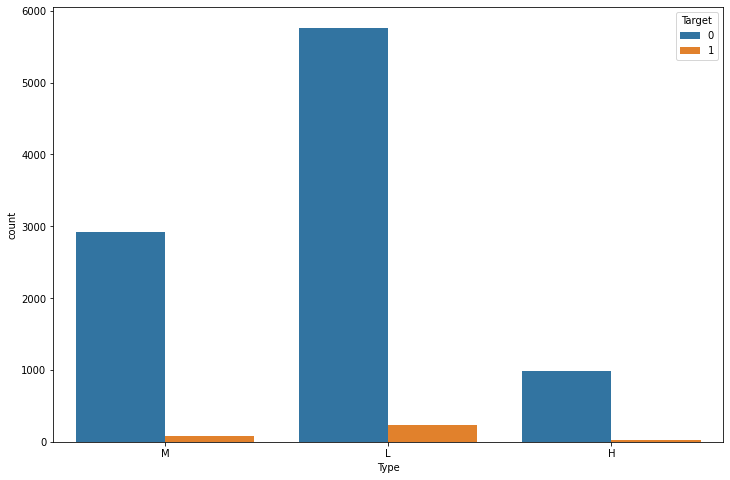

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(data = pred_df, x = 'Type', hue = 'Target')

In [11]:
pred_df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [12]:
pred_df.pivot_table(index=['Type', 'Failure Type'], 
                    values=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], 
                    aggfunc = 'mean')

Air temperature [K]  Process temperature [K]  \
Type Failure Type                                                             
H    Heat Dissipation Failure           302.700000               310.950000   
     No Failure                         299.834423               309.914402   
     Overstrain Failure                 302.800000               312.400000   
     Power Failure                      300.440000               310.160000   
     Random Failures                    300.825000               310.650000   
     Tool Wear Failure                  299.800000               309.316667   
L    Heat Dissipation Failure           302.582432               310.813514   
     No Failure                         299.982717               310.000017   
     Overstrain Failure                 299.787671               309.997260   
     Power Failure                      299.949153               309.918644   
     Random Failures                    301.116667               311.125000   
     Tool Wear Failure                  300.340000               310.200000   
M    Heat Dissipation Failure           302.496667               310.723333   
     No Failure                         299.999863               310.009979   
     Overstrain Failure                 300.600000               310.450000   
     Power Failure                      300.258065               309.990323   
     Random Failures                    298.550000               308.750000   
     Tool Wear Failure                  300.407143               310.464286   

                               Rotational speed [rpm]  Tool wear [min]  \
Type Failure Type                                                        
H    Heat Dissipation Failure             1322.375000        87.750000   
     No Failure                           1540.232891       106.781410   
     Overstrain Failure                   1411.000000       246.000000   
     Power Failure                        1581.600000       141.800000   
     Random Failures                      1505.750000        55.250000   
     Tool Wear Failure                    1492.166667       220.833333   
L    Heat Dissipation Failure             1336.256757       106.932432   
     No Failure                           1541.947195       106.682300   
     Overstrain Failure                   1356.246575       208.109589   
     Power Failure                        1780.101695       100.355932   
     Random Failures                      1475.083333       142.500000   
     Tool Wear Failure                    1568.360000       214.680000   
M    Heat Dissipation Failure             1346.333333       113.566667   
     No Failure                           1537.151235       106.637860   
     Overstrain Failure                   1303.500000       200.750000   
     Power Failure                        1762.677419        98.354839   
     Random Failures                      1543.000000       113.500000   
     Tool Wear Failure                    1608.428571       218.071429   

                               Torque [Nm]  
Type Failure Type                           
H    Heat Dissipation Failure    55.137500  
     No Failure                  39.601124  
     Overstrain Failure          53.800000  
     Power Failure               56.360000  
     Random Failures             41.275000  
     Tool Wear Failure           41.083333  
L    Heat Dissipation Failure    52.982432  
     No Failure                  39.544120  
     Overstrain Failure          56.597260  
     Power Failure               47.706780  
     Random Failures             45.350000  
     Tool Wear Failure           36.516000  
M    Heat Dissipation Failure    51.646667  
     No Failure                  39.790432  
     Overstrain Failure          62.775000  
     Power Failure               48.787097  
     Random Failures             37.050000  
     Tool Wear Failure           36.842857

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

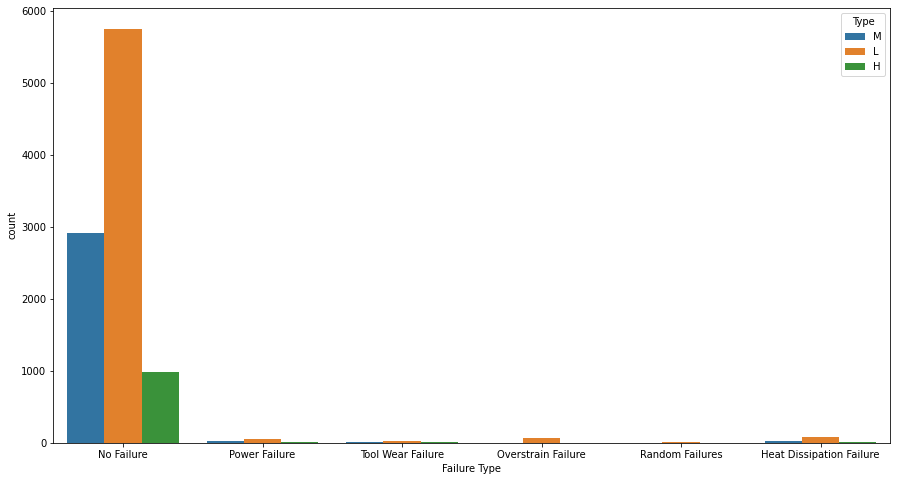

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(x = 'Failure Type', hue = 'Type', data = pred_df)

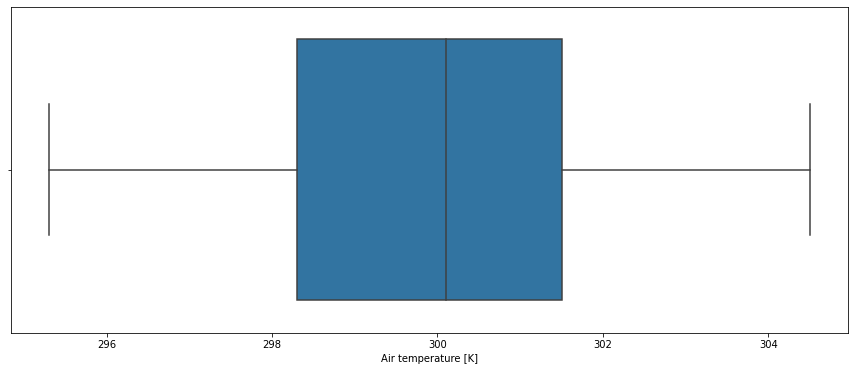

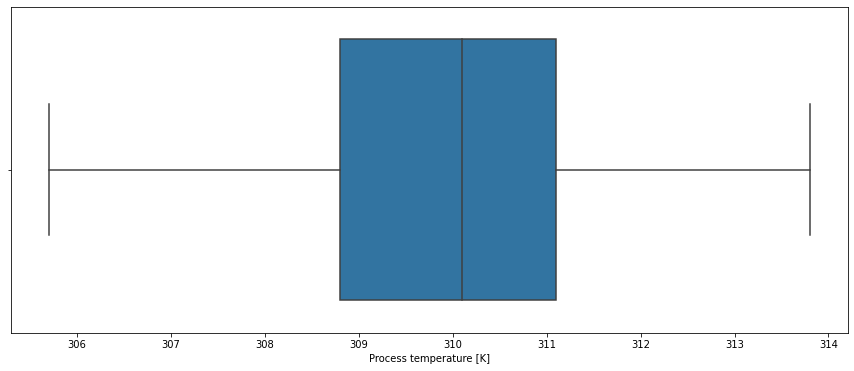

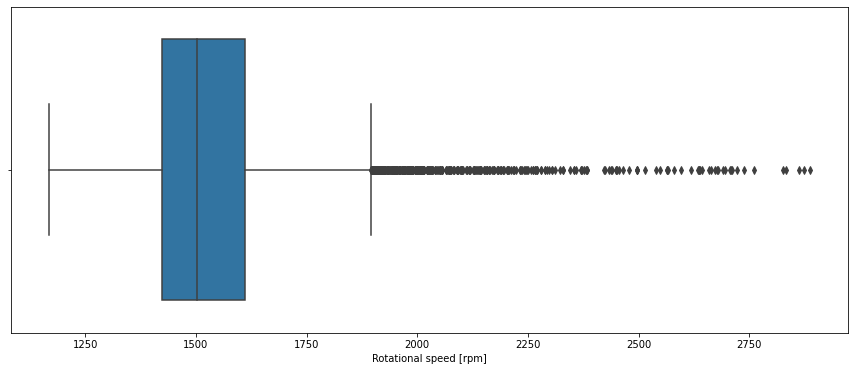

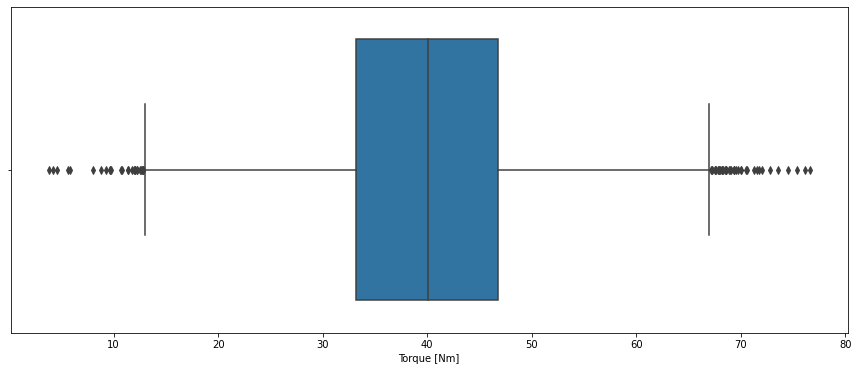

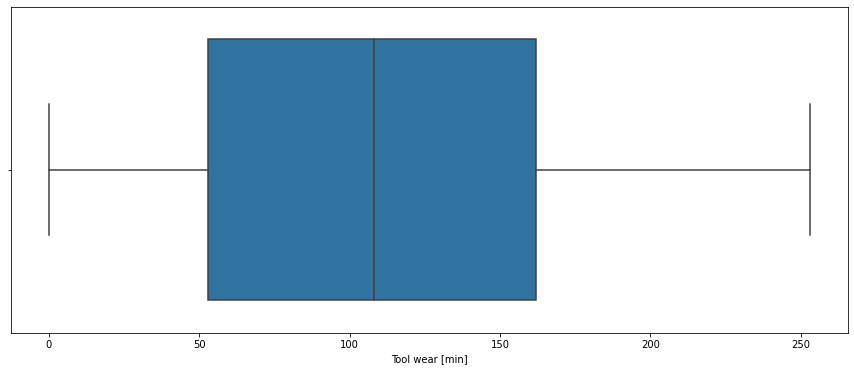

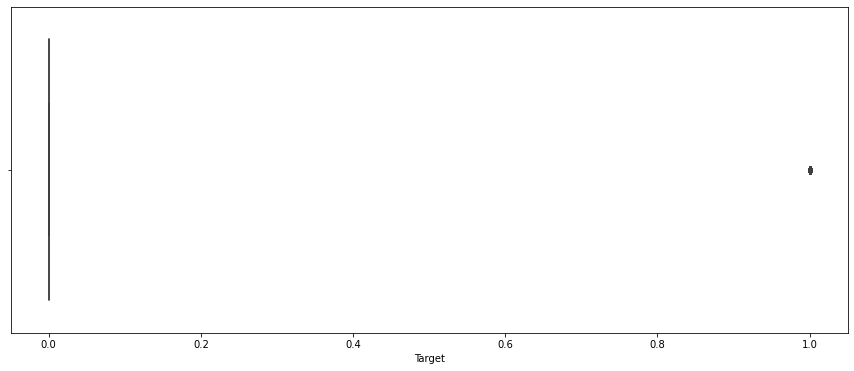

In [14]:
for col in pred_df.select_dtypes('number'): 
    plt.figure(figsize=(15, 6))
    sns.boxplot(pred_df[col])
    plt.show()

In [15]:
# We have a lot of outliers in Torque and Rotational Speed
# Let's check in pivot table

pred_df.pivot_table(index = 'Failure Type', values = ['Rotational speed [rpm]', 'Torque [Nm]'], aggfunc = 'mean')

,Rotational speed [rpm],Torque [Nm]
Failure Type,,
Heat Dissipation Failure,1337.964286,52.778571
No Failure,1540.324389,39.624316
Overstrain Failure,1354.243590,56.878205
Power Failure,1763.968421,48.514737
Random Failures,1489.444444,43.522222
Tool Wear Failure,1570.666667,37.226667


In [16]:
pred_df.pivot_table(index='Target', aggfunc='mean')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Torque [Nm]
Target,,,,,
0,299.973999,309.995570,1540.260014,106.693717,39.629655
1,300.886431,310.290265,1496.486726,143.781711,50.168142


#### There is some significant difference between the avg values of Rotational speed, Tool wear and Torque for two classes
#### However, as the dataset is imbalanced, we cannot conclude anything for now

In [17]:
pred_df.pivot_table(index=['Target', 'Failure Type'], aggfunc='count')

Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                               9643                     9643   
       Random Failures                            18                       18   
1      Heat Dissipation Failure                  112                      112   
       No Failure                                  9                        9   
       Overstrain Failure                         78                       78   
       Power Failure                              95                       95   
       Tool Wear Failure                          45                       45   

                                 Rotational speed [rpm]  Tool wear [min]  \
Target Failure Type                                                        
0      No Failure                                  9643             9643   
       Random Failures                               18               18   
1      Heat Dissipation Failure                     112              112   
       No Failure                                     9                9   
       Overstrain Failure                            78               78   
       Power Failure                                 95               95   
       Tool Wear Failure                             45               45   

                                 Torque [Nm]  Type  
Target Failure Type                                 
0      No Failure                       9643  9643  
       Random Failures                    18    18  
1      Heat Dissipation Failure          112   112  
       No Failure                          9     9  
       Overstrain Failure                 78    78  
       Power Failure                      95    95  
       Tool Wear Failure                  45    45

### We see that we have some values of No Failure in class 1 as well. 
### Also, there is no random failure in class 1
### We will delete the rows for No Failure from class 1 as both of these contradict

In [22]:
pred_df[ (pred_df['Target'] == 1) & (pred_df['Failure Type'] == 'No Failure') ].index

Int64Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [23]:
pred_df.drop([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], axis=0, inplace=True)

In [24]:
pred_df.duplicated().sum()

0

In [25]:
# Let's check if we have any constant columns with very minimal variance
# If the variance is very minimal, we don't need those columns

from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.25)
var_thresh.fit(pred_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]', 
                        'Torque [Nm]']])

VarianceThreshold(threshold=0.25)

In [26]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True])

In [27]:
pred_df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [28]:
# We don't have any columns that have variance of 0.25 or less
# Let's now create dummy variables for the Type column

new_df = pred_df.copy()

new_df = pd.get_dummies(pred_df, columns=['Type'], drop_first=True)
new_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,0,1
1,298.2,308.7,1408,46.3,3,0,No Failure,1,0
2,298.1,308.5,1498,49.4,5,0,No Failure,1,0
3,298.2,308.6,1433,39.5,7,0,No Failure,1,0
4,298.2,308.7,1408,40.0,9,0,No Failure,1,0


In [29]:
new_df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [30]:
# Let's Cat Encode Failure Type column

cat_dict = {'No Failure' : 0, 'Heat Dissipation Failure' : 1, 'Power Failure' : 2, 
            'Overstrain Failure' : 3, 'Random Failures' : 4, 'Tool Wear Failure' : 5}

new_df['Failure Type'] = new_df['Failure Type'].map(cat_dict)
new_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


In [31]:
new_df['Failure Type'].value_counts()

0    9643
1     112
2      95
3      78
5      45
4      18
Name: Failure Type, dtype: int64

In [32]:
# Let's now split the dataset for model building
# We will not include the Target column because we already have Failure Type column

X = new_df.drop(['Target', 'Failure Type'], axis=1)
y = new_df['Failure Type']

print(X.head())
print()
print(y.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Type_L  Type_M  
0         42.8                0       0       1  
1         46.3                3       1       0  
2         49.4                5       1       0  
3         39.5                7       1       0  
4         40.0                9       1       0  

0    0
1    0
2    0
3    0
4    0
Name: Failure Type, dtype: int64


In [72]:
# Our dataset if imbalanced. We will still build a baseline model to check the accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 2 )

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(6993, 7)
(2998, 7)
(6993,)
(2998,)


In [73]:
# Let's build a baseline model and see how does the model performs

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [74]:
y_pred = svc.predict(X_test)

from sklearn import metrics

print('ACcuracy: ', metrics.accuracy_score(y_test, y_pred))
print()

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
print()

print('Classification Report: \n', metrics.classification_report(y_test, y_pred))

ACcuracy:  0.9653102068045364

Confusion Matrix: 
 [[2894    0    0    0    0    0]
 [  34    0    0    0    0    0]
 [  29    0    0    0    0    0]
 [  23    0    0    0    0    0]
 [   5    0    0    0    0    0]
 [  13    0    0    0    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2894
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        13

    accuracy                           0.97      2998
   macro avg       0.16      0.17      0.16      2998
weighted avg       0.93      0.97      0.95      2998



In [75]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros = RandomOverSampler(random_state=2)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [76]:
y_train_res.value_counts()

0    6749
3    6749
1    6749
2    6749
5    6749
4    6749
Name: Failure Type, dtype: int64

In [81]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

y_pred = svc.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print()

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
print()

print('Classification Report: \n', metrics.classification_report(y_test, y_pred))

Accuracy:  0.4132755170113409

Confusion Matrix: 
 [[1160  393   20  121  945  255]
 [   0   30    0    4    0    0]
 [   0    9   14    3    2    1]
 [   0    0    0   21    0    2]
 [   1    1    0    0    3    0]
 [   0    0    0    2    0   11]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.40      0.57      2894
           1       0.07      0.88      0.13        34
           2       0.41      0.48      0.44        29
           3       0.14      0.91      0.24        23
           4       0.00      0.60      0.01         5
           5       0.04      0.85      0.08        13

    accuracy                           0.41      2998
   macro avg       0.28      0.69      0.25      2998
weighted avg       0.97      0.41      0.56      2998



In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_res, y_train_res)

y_pred = knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print()

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
print()

print('Classification Report: \n', metrics.classification_report(y_test, y_pred))

Accuracy:  0.9319659829914958

Confusion Matrix: 
 [[1836   39    6   14    7   27]
 [  15    6    1    0    0    0]
 [   3    2   11    3    0    0]
 [   2    1    3   10    0    0]
 [   4    0    0    0    0    0]
 [   7    0    0    2    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1929
           1       0.12      0.27      0.17        22
           2       0.52      0.58      0.55        19
           3       0.34      0.62      0.44        16
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.93      1999
   macro avg       0.33      0.40      0.36      1999
weighted avg       0.96      0.93      0.94      1999



### KNN is working well on our dataset
### We will tune this model to see if the performance increases

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_res)

X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_res.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_train_res.columns)

X_train_sc.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,-0.772215,-1.120751,0.097859,-0.035796,-1.806991,0.733776,-0.534018
1,-1.305447,-1.663710,-0.320817,0.159850,-1.503565,0.733776,-0.534018
2,-0.820691,-0.985011,-0.225214,-0.366369,-1.028636,-1.362813,1.872598
3,1.457665,1.390435,1.439602,-1.675171,-0.382205,0.733776,-0.534018
4,-0.917642,-0.306312,0.420933,-0.764407,0.871080,0.733776,-0.534018


In [67]:
# We are already getting high accuracy because of the imbalance ness of the classes
# Hence, we will here use re-call score to find the best K value

from sklearn.model_selection import cross_val_score

rec_score = []

for i in range (1, 30): 
    KNN = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(KNN, X_train_sc, y_train_res, cv=10)
    rec_score.append(score.mean())

In [68]:
err_rate = []

for i in range (1, 30): 
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train_sc, y_train_res)
    pred_i = KNN.predict(X_test_sc)

    err_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

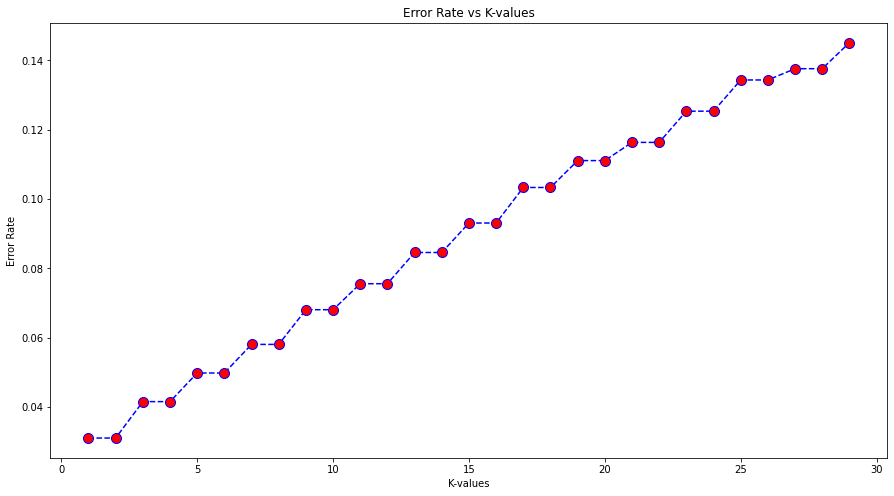

In [69]:
plt.figure(figsize=(15, 8))

plt.plot(range(1, 30), err_rate, color = 'blue', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)

plt.title('Error Rate vs K-values')
plt.xlabel('K-values')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Recall Score')

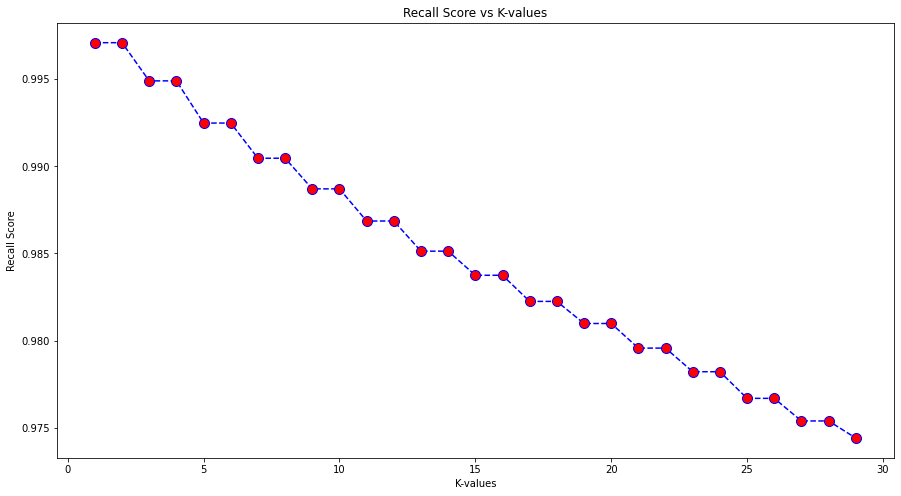

In [70]:
plt.figure(figsize=(15, 8))

plt.plot(range(1, 30), rec_score, color = 'blue', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)

plt.title('Recall Score vs K-values')
plt.xlabel('K-values')
plt.ylabel('Recall Score')

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_sc, y_train_res)

y_pred = knn.predict(X_test_sc)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print()

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
print()

print('Classification Report: \n', metrics.classification_report(y_test, y_pred))

Accuracy:  0.9584688516387291

Confusion Matrix: 
 [[3759   32   17    9   13   28]
 [  15   29    1    0    0    0]
 [   8    3   25    2    0    0]
 [   9    1    4   17    0    0]
 [   7    0    0    0    0    0]
 [  16    0    0    1    0    1]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3858
           1       0.45      0.64      0.53        45
           2       0.53      0.66      0.59        38
           3       0.59      0.55      0.57        31
           4       0.00      0.00      0.00         7
           5       0.03      0.06      0.04        18

    accuracy                           0.96      3997
   macro avg       0.43      0.48      0.45      3997
weighted avg       0.97      0.96      0.96      3997



In [80]:
# KNN is not generalizing well if we change the train test split sizes
# However, we earlier trained SVC only on the resampled data and not on the scaled one
# So, we will now train SVC again on scaled data to check if performance changes

svc = SVC()
svc.fit(X_train_sc, y_train_res)

y_pred = svc.predict(X_test_sc)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print()

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
print()

print('Classification Report: \n', metrics.classification_report(y_test, y_pred))

Accuracy:  0.8795863909272849

Confusion Matrix: 
 [[2547   69   18   16  127  117]
 [   1   33    0    0    0    0]
 [   1    1   25    2    0    0]
 [   1    0    0   22    0    0]
 [   4    0    0    0    1    0]
 [   2    1    0    1    0    9]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      2894
           1       0.32      0.97      0.48        34
           2       0.58      0.86      0.69        29
           3       0.54      0.96      0.69        23
           4       0.01      0.20      0.02         5
           5       0.07      0.69      0.13        13

    accuracy                           0.88      2998
   macro avg       0.42      0.76      0.49      2998
weighted avg       0.98      0.88      0.92      2998



### Great! SVC is generalizing well with the scaled data as compared to KNN model
### So, now we will tune the SVC model even further to get the best possible outcome

In [83]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 0.5, 1, 10, 50, 100], 
          'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 
          'degree': [1, 2, 3, 4, 5]}

grid = GridSearchCV(SVC(), param_grid=params, n_jobs=-1, cv = 10, verbose=2)

grid.fit(X_train_sc, y_train_res)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             verbose=2)

In [84]:
print(grid.best_params_)
print(grid.score(X_test_sc, y_test))

{'C': 100, 'degree': 1, 'kernel': 'rbf'}
0.9623082054703136


In [93]:
svc_final = SVC(C=5.0, kernel='rbf', degree=1)

svc_final.fit(X_train_sc, y_train_res)

y_pred_final = svc_final.predict(X_test_sc)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_final))
print()

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred_final))
print()

print('Classification Report: \n', metrics.classification_report(y_test, y_pred_final))

Accuracy:  0.923282188125417

Confusion Matrix: 
 [[2681   48    9   12   65   79]
 [   1   33    0    0    0    0]
 [   5    0   23    1    0    0]
 [   0    0    1   22    0    0]
 [   4    0    0    0    1    0]
 [   4    0    0    1    0    8]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      2894
           1       0.41      0.97      0.57        34
           2       0.70      0.79      0.74        29
           3       0.61      0.96      0.75        23
           4       0.02      0.20      0.03         5
           5       0.09      0.62      0.16        13

    accuracy                           0.92      2998
   macro avg       0.47      0.74      0.53      2998
weighted avg       0.98      0.92      0.95      2998



In [109]:
# Saving the model for future use
import pickle

# open a file, where you ant to store the data
file = open('pred_maintenance.pkl', 'wb+')

# dump information to that file
pickle.dump(svc_final, file)

In [112]:
model = open("pred_maintenance.pkl", "rb+")

import pickle

support_vector = pickle.load(model)

Y_prediction = support_vector.predict(X_test_sc)

print(metrics.accuracy_score(y_test, Y_prediction))

0.923282188125417


### Our Model's accuracy is around 92.33%. But, considering that it is an imbalanced dataset, we are more interested in Recall score
### Recall is nothing but how good is the model in learning and generalizing and then predicting the correct positives (TP / TP + FN)